# Parte 2 - Experimentção

> Autor: Jonatas Travessa Souza de Barros - 1935310001

> Autor: Fabrizio Honda - 1715280006

> Autor: Dayvson Silva - 1915310007

## Importação das bibliotecas

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import os

## Leitura do arquivo data0.txt com numpy

In [2]:
data0 = np.fromfile('../dados/data0.txt')
print(data0)

[-0.00149369 -0.03581784  0.         ...  1.02021556  0.86533059
  1.        ]


### Vendo o formato inicial do array

In [3]:
data0.shape

(1800,)

#### Sendo 1800 valores, significa que há 600 exemplos, visto que cada exemplo é representado por (x1, x2, yd). Logo, vamos transformar o array para representar os exemplos.

In [4]:
data0 = data0.reshape(600, 3)
print(data0)

[[-0.00149369 -0.03581784  0.        ]
 [ 0.01234945  0.10249524  0.        ]
 [ 0.13954598  0.05607083  0.        ]
 ...
 [ 0.95751872  1.0035204   1.        ]
 [ 0.97981588  1.00949493  1.        ]
 [ 1.02021556  0.86533059  1.        ]]


## Algoritmo de treinamento do Perceptron

#### A fim de diminuir a repetição de código, o algoritmo do Perceptron de Rosenblatt foi reimplementado em formato de uma classe, a qual pode ser econtrada na pasta src.

In [5]:
import sys
sys.path.append('../')
from src.Perceptron import Perceptron

## Execução das configurações

    Cada configuração é executada 100 vezes

### Configuração 1.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [99]:
learning_rate = 0.4
weights = (-100.0, 100.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)

    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)
    

c1em = np.round(np.mean(epochs), 4)
c1esd = np.round(np.std(epochs), 4)
c1am = np.round(np.mean(adjustments), 4)
c1asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c1em, " Desvio Padrão: ", c1esd)
print("Ajustes. Média: ", c1am, " Desvio Padrão: ", c1asd)


	Iteração número  1

Quantidade total de épocas: 9
Quantidade total de ajustes: 659
Vetor final de pesos: [ 2.528  -3.3203  8.5246]

	Iteração número  2

Quantidade total de épocas: 30
Quantidade total de ajustes: 298
Vetor final de pesos: [ 26.9466 -39.351   88.6959]

	Iteração número  3

Quantidade total de épocas: 18
Quantidade total de ajustes: 347
Vetor final de pesos: [ 12.4483 -17.4421  40.5667]

	Iteração número  4

Quantidade total de épocas: 8
Quantidade total de ajustes: 223
Vetor final de pesos: [22.2552 -6.6706 92.7646]

	Iteração número  5

Quantidade total de épocas: 3
Quantidade total de ajustes: 223
Vetor final de pesos: [2.8014 0.1693 7.3138]

	Iteração número  6

Quantidade total de épocas: 3
Quantidade total de ajustes: 206
Vetor final de pesos: [4.1924 1.6663 7.5135]

	Iteração número  7

Quantidade total de épocas: 8
Quantidade total de ajustes: 204
Vetor final de pesos: [ 0.7134 -0.0418  1.7528]

	Iteração número  8

Quantidade total de épocas: 2
Quantidade tota


Quantidade total de épocas: 17
Quantidade total de ajustes: 648
Vetor final de pesos: [ 10.9184 -15.4994  35.7216]

	Iteração número  63

Quantidade total de épocas: 37
Quantidade total de ajustes: 236
Vetor final de pesos: [ 80.4289  47.405  120.2323]

	Iteração número  64

Quantidade total de épocas: 7
Quantidade total de ajustes: 156
Vetor final de pesos: [4.3296 2.2281 7.1988]

	Iteração número  65

Quantidade total de épocas: 12
Quantidade total de ajustes: 208
Vetor final de pesos: [ 19.4631 -18.3575  73.8352]

	Iteração número  66

Quantidade total de épocas: 21
Quantidade total de ajustes: 466
Vetor final de pesos: [ 15.9241 -23.2677  52.5516]

	Iteração número  67

Quantidade total de épocas: 15
Quantidade total de ajustes: 163
Vetor final de pesos: [62.9238 37.1912 94.1677]

	Iteração número  68

Quantidade total de épocas: 8
Quantidade total de ajustes: 457
Vetor final de pesos: [0.9348 0.125  1.9112]

	Iteração número  69

Quantidade total de épocas: 9
Quantidade total de 

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [100]:
weights = perceptron.weights
weights

array([16.6053,  3.5802, 46.2746])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [101]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.3588 -(0.0774)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

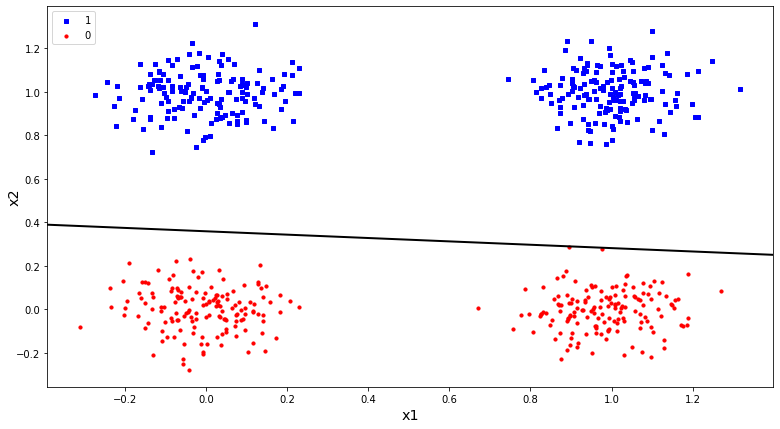

In [102]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 2.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [14]:
learning_rate = 0.4
weights = (-1.0, 1.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)


c2em = np.round(np.mean(epochs), 4)
c2sd = np.round(np.std(epochs), 4)
c2am = np.round(np.mean(adjustments), 4)
c2asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c2em, " Desvio Padrão: ", c2esd)
print("Ajustes. Média: ", c2am, " Desvio Padrão: ", c2asd)


	Iteração número  1

Quantidade total de épocas: 4
Quantidade total de ajustes: 4
Vetor final de pesos: [ 0.1909 -0.0213  0.4315]

	Iteração número  2

Quantidade total de épocas: 5
Quantidade total de ajustes: 11
Vetor final de pesos: [0.5736 0.116  1.2704]

	Iteração número  3

Quantidade total de épocas: 7
Quantidade total de ajustes: 12
Vetor final de pesos: [0.661  0.0914 1.3665]

	Iteração número  4

Quantidade total de épocas: 5
Quantidade total de ajustes: 7
Vetor final de pesos: [0.428 0.079 1.183]

	Iteração número  5

Quantidade total de épocas: 5
Quantidade total de ajustes: 5
Vetor final de pesos: [ 0.4654 -0.111   1.2897]

	Iteração número  6

Quantidade total de épocas: 5
Quantidade total de ajustes: 11
Vetor final de pesos: [ 0.471  -0.1265  1.1801]

	Iteração número  7

Quantidade total de épocas: 5
Quantidade total de ajustes: 11
Vetor final de pesos: [0.4423 0.0096 1.1725]

	Iteração número  8

Quantidade total de épocas: 5
Quantidade total de ajustes: 6
Vetor final


Quantidade total de épocas: 5
Quantidade total de ajustes: 6
Vetor final de pesos: [ 0.9728 -0.1663  1.5783]

	Iteração número  69

Quantidade total de épocas: 5
Quantidade total de ajustes: 10
Vetor final de pesos: [0.6099 0.175  1.1986]

	Iteração número  70

Quantidade total de épocas: 4
Quantidade total de ajustes: 6
Vetor final de pesos: [ 0.6911 -0.1846  1.4405]

	Iteração número  71

Quantidade total de épocas: 5
Quantidade total de ajustes: 10
Vetor final de pesos: [0.7651 0.042  1.1471]

	Iteração número  72

Quantidade total de épocas: 6
Quantidade total de ajustes: 12
Vetor final de pesos: [0.6595 0.1797 1.2819]

	Iteração número  73

Quantidade total de épocas: 4
Quantidade total de ajustes: 6
Vetor final de pesos: [ 0.3298 -0.0333  0.5849]

	Iteração número  74

Quantidade total de épocas: 4
Quantidade total de ajustes: 7
Vetor final de pesos: [ 0.4458 -0.2247  0.8877]

	Iteração número  75

Quantidade total de épocas: 8
Quantidade total de ajustes: 16
Vetor final de peso

#### O seguinte vetor de pesos, obtido na última execução da configuração 2, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [15]:
weights = perceptron.weights
weights

array([ 0.3813, -0.0735,  1.1941])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [16]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.3193 -(-0.0616)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

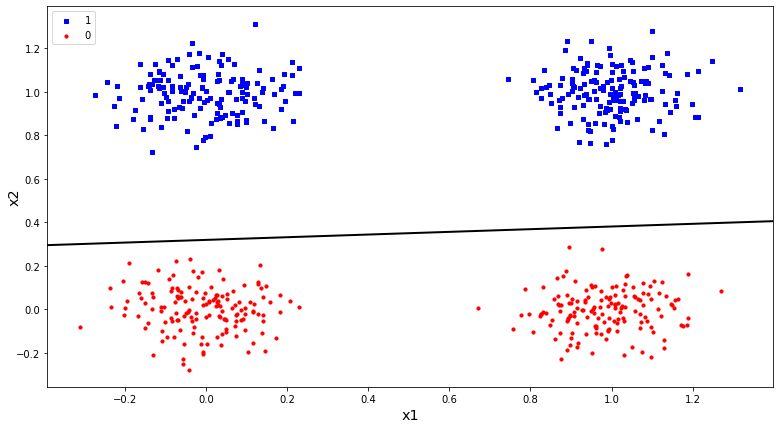

In [17]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 3.
    Valor da taxa de aprendizado: 0.4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [18]:
learning_rate = 0.4
weights = (-0.5, 0.5)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

c3em = np.round(np.mean(epochs), 4)
c3esd = np.round(np.std(epochs), 4)
c3am = np.round(np.mean(adjustments), 4)
c3asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c3em, " Desvio Padrão: ", c3esd)
print("Ajustes. Média: ", c3am, " Desvio Padrão: ", c3asd)


	Iteração número  1

Quantidade total de épocas: 5
Quantidade total de ajustes: 8
Vetor final de pesos: [0.5678 0.2639 1.0101]

	Iteração número  2

Quantidade total de épocas: 5
Quantidade total de ajustes: 9
Vetor final de pesos: [0.5266 0.0732 1.234 ]

	Iteração número  3

Quantidade total de épocas: 6
Quantidade total de ajustes: 10
Vetor final de pesos: [ 0.8943 -0.2128  1.4829]

	Iteração número  4

Quantidade total de épocas: 4
Quantidade total de ajustes: 6
Vetor final de pesos: [ 0.4887 -0.1024  0.874 ]

	Iteração número  5

Quantidade total de épocas: 3
Quantidade total de ajustes: 2
Vetor final de pesos: [ 0.3079 -0.0619  0.7394]

	Iteração número  6

Quantidade total de épocas: 3
Quantidade total de ajustes: 4
Vetor final de pesos: [0.3207 0.0336 0.5892]

	Iteração número  7

Quantidade total de épocas: 7
Quantidade total de ajustes: 13
Vetor final de pesos: [0.7078 0.1095 1.3966]

	Iteração número  8

Quantidade total de épocas: 6
Quantidade total de ajustes: 10
Vetor fin


Quantidade total de épocas: 5
Quantidade total de ajustes: 6
Vetor final de pesos: [ 0.3344 -0.1835  1.1749]

	Iteração número  67

Quantidade total de épocas: 6
Quantidade total de ajustes: 9
Vetor final de pesos: [ 0.7998 -0.1443  1.3884]

	Iteração número  68

Quantidade total de épocas: 2
Quantidade total de ajustes: 0
Vetor final de pesos: [0.25294836 0.12435272 0.42723383]

	Iteração número  69

Quantidade total de épocas: 5
Quantidade total de ajustes: 6
Vetor final de pesos: [0.6282 0.284  1.0659]

	Iteração número  70

Quantidade total de épocas: 5
Quantidade total de ajustes: 7
Vetor final de pesos: [ 0.8163 -0.094   1.2645]

	Iteração número  71

Quantidade total de épocas: 4
Quantidade total de ajustes: 6
Vetor final de pesos: [ 0.4498 -0.0355  0.8195]

	Iteração número  72

Quantidade total de épocas: 4
Quantidade total de ajustes: 7
Vetor final de pesos: [0.3894 0.0264 0.9014]

	Iteração número  73

Quantidade total de épocas: 4
Quantidade total de ajustes: 7
Vetor final

#### O seguinte vetor de pesos, obtido na última execução da configuração 3, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [19]:
weights = perceptron.weights
weights

array([0.6921, 0.1844, 1.2242])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [20]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.5653 -(0.1506)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

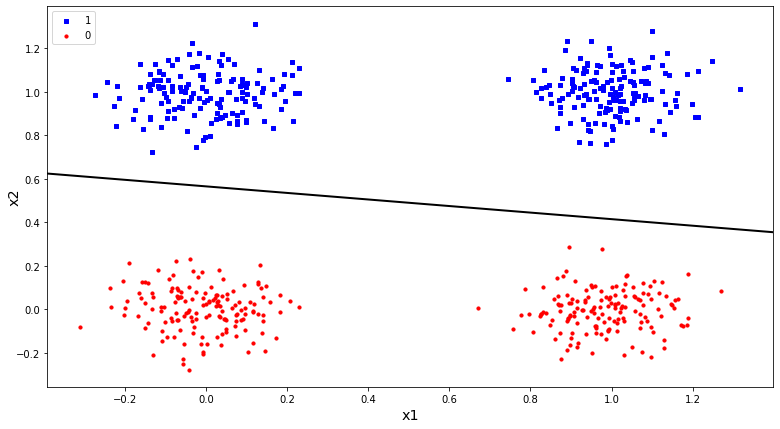

In [21]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 4.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [63]:
learning_rate = 0.1
weights = (-100.0, 100.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

c4em = np.round(np.mean(epochs), 4)
c4esd = np.round(np.std(epochs), 4)
c4am = np.round(np.mean(adjustments), 4)
c4asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c4em, " Desvio Padrão: ", c4esd)
print("Ajustes. Média: ", c4am, " Desvio Padrão: ", c4asd)


	Iteração número  1

Quantidade total de épocas: 47
Quantidade total de ajustes: 1513
Vetor final de pesos: [  9.8513 -14.5078  32.8619]

	Iteração número  2

Quantidade total de épocas: 60
Quantidade total de ajustes: 1465
Vetor final de pesos: [ 13.3069 -19.7303  44.2093]

	Iteração número  3

Quantidade total de épocas: 36
Quantidade total de ajustes: 1648
Vetor final de pesos: [ 6.3719 -9.2402 20.9693]

	Iteração número  4

Quantidade total de épocas: 10
Quantidade total de ajustes: 1201
Vetor final de pesos: [ 0.4168 -0.389   1.293 ]

	Iteração número  5

Quantidade total de épocas: 48
Quantidade total de ajustes: 1824
Vetor final de pesos: [  9.9462 -14.6457  32.9335]

	Iteração número  6

Quantidade total de épocas: 27
Quantidade total de ajustes: 1060
Vetor final de pesos: [44.8502 24.723  74.0512]

	Iteração número  7

Quantidade total de épocas: 55
Quantidade total de ajustes: 1619
Vetor final de pesos: [ 12.0961 -17.9267  40.1306]

	Iteração número  8

Quantidade total de é


Quantidade total de épocas: 32
Quantidade total de ajustes: 2370
Vetor final de pesos: [ 4.9484 -7.1596 16.2667]

	Iteração número  63

Quantidade total de épocas: 10
Quantidade total de ajustes: 1467
Vetor final de pesos: [0.1242 0.0155 0.2892]

	Iteração número  64

Quantidade total de épocas: 100
Quantidade total de ajustes: 990
Vetor final de pesos: [ 24.1611 -35.7638  80.0634]

	Iteração número  65

Quantidade total de épocas: 36
Quantidade total de ajustes: 2101
Vetor final de pesos: [16.4812  9.6746 24.6321]

	Iteração número  66

Quantidade total de épocas: 119
Quantidade total de ajustes: 1268
Vetor final de pesos: [ 29.0753 -43.0749  96.3987]

	Iteração número  67

Quantidade total de épocas: 20
Quantidade total de ajustes: 1901
Vetor final de pesos: [ 2.6725 -3.8651  8.8309]

	Iteração número  68

Quantidade total de épocas: 19
Quantidade total de ajustes: 453
Vetor final de pesos: [ 8.3049  4.8899 12.5702]

	Iteração número  69

Quantidade total de épocas: 74
Quantidade to

#### O seguinte vetor de pesos, obtido na última execução da configuração 4, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [64]:
weights = perceptron.weights
weights

array([39.43280737,  0.34020029, 63.43291235])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [65]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.6216 -(0.0054)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

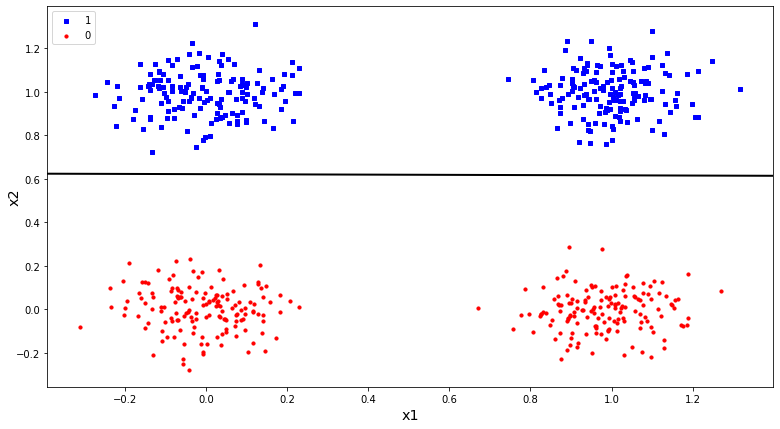

In [66]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 5.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [22]:
learning_rate = 0.1
weights = (-1.0, 1.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)


c5em = np.round(np.mean(epochs), 4)
c5esd = np.round(np.std(epochs), 4)
c5am = np.round(np.mean(adjustments), 4)
c5asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c5em, " Desvio Padrão: ", c5esd)
print("Ajustes. Média: ", c5am, " Desvio Padrão: ", c5asd)


	Iteração número  1

Quantidade total de épocas: 2
Quantidade total de ajustes: 0
Vetor final de pesos: [ 0.18056822 -0.05585422  0.42495941]

	Iteração número  2

Quantidade total de épocas: 3
Quantidade total de ajustes: 7
Vetor final de pesos: [0.3708 0.0858 0.5808]

	Iteração número  3

Quantidade total de épocas: 5
Quantidade total de ajustes: 27
Vetor final de pesos: [ 0.1835 -0.2139  0.6606]

	Iteração número  4

Quantidade total de épocas: 6
Quantidade total de ajustes: 31
Vetor final de pesos: [0.1401 0.0384 0.3066]

	Iteração número  5

Quantidade total de épocas: 5
Quantidade total de ajustes: 14
Vetor final de pesos: [ 0.3245 -0.3229  0.9678]

	Iteração número  6

Quantidade total de épocas: 6
Quantidade total de ajustes: 22
Vetor final de pesos: [ 0.1792 -0.0502  0.3199]

	Iteração número  7

Quantidade total de épocas: 4
Quantidade total de ajustes: 18
Vetor final de pesos: [ 0.3299 -0.4144  1.1419]

	Iteração número  8

Quantidade total de épocas: 3
Quantidade total de 


Quantidade total de épocas: 4
Quantidade total de ajustes: 16
Vetor final de pesos: [0.3938 0.1164 0.6033]

	Iteração número  64

Quantidade total de épocas: 7
Quantidade total de ajustes: 32
Vetor final de pesos: [ 0.1772 -0.1233  0.5711]

	Iteração número  65

Quantidade total de épocas: 5
Quantidade total de ajustes: 16
Vetor final de pesos: [ 0.1236 -0.0031  0.3817]

	Iteração número  66

Quantidade total de épocas: 6
Quantidade total de ajustes: 22
Vetor final de pesos: [ 0.1979 -0.0653  0.5145]

	Iteração número  67

Quantidade total de épocas: 6
Quantidade total de ajustes: 16
Vetor final de pesos: [ 0.1334 -0.0022  0.3396]

	Iteração número  68

Quantidade total de épocas: 4
Quantidade total de ajustes: 7
Vetor final de pesos: [ 0.2836 -0.288   0.8718]

	Iteração número  69

Quantidade total de épocas: 6
Quantidade total de ajustes: 31
Vetor final de pesos: [ 0.1154 -0.0283  0.3408]

	Iteração número  70

Quantidade total de épocas: 5
Quantidade total de ajustes: 20
Vetor fina

#### O seguinte vetor de pesos, obtido na última execução da configuração 5, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [23]:
weights = perceptron.weights
weights

array([ 0.2152, -0.0806,  0.5653])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [24]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.3807 -(-0.1426)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

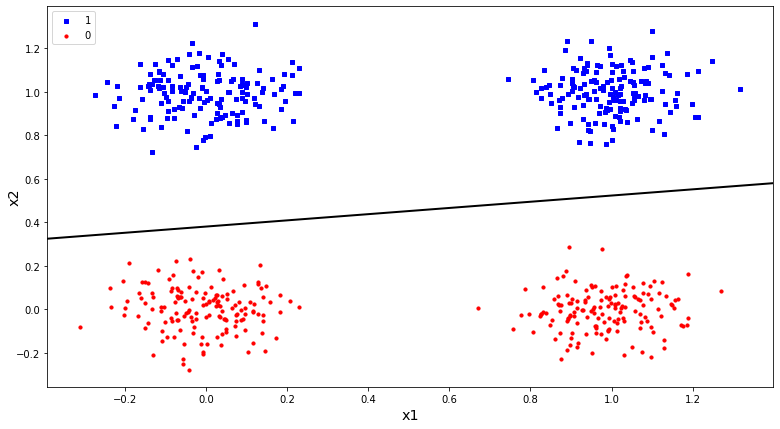

In [25]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 6.
    Valor da taxa de aprendizado: 0.1
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

#### Execuções

In [26]:
learning_rate = 0.1
weights = (-0.5, 0.5)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

c6em = np.round(np.mean(epochs), 4)
c6esd = np.round(np.std(epochs), 4)
c6am = np.round(np.mean(adjustments), 4)
c6asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c6em, " Desvio Padrão: ", c6esd)
print("Ajustes. Média: ", c6am, " Desvio Padrão: ", c6asd)


	Iteração número  1

Quantidade total de épocas: 5
Quantidade total de ajustes: 13
Vetor final de pesos: [ 0.2904 -0.0311  0.4513]

	Iteração número  2

Quantidade total de épocas: 3
Quantidade total de ajustes: 2
Vetor final de pesos: [ 0.1779 -0.0236  0.5155]

	Iteração número  3

Quantidade total de épocas: 5
Quantidade total de ajustes: 11
Vetor final de pesos: [ 0.236  -0.1154  0.5156]

	Iteração número  4

Quantidade total de épocas: 5
Quantidade total de ajustes: 6
Vetor final de pesos: [0.3516 0.1639 0.6819]

	Iteração número  5

Quantidade total de épocas: 6
Quantidade total de ajustes: 15
Vetor final de pesos: [0.1393 0.02   0.3066]

	Iteração número  6

Quantidade total de épocas: 6
Quantidade total de ajustes: 18
Vetor final de pesos: [0.1368 0.004  0.3133]

	Iteração número  7

Quantidade total de épocas: 4
Quantidade total de ajustes: 9
Vetor final de pesos: [ 0.0559 -0.0023  0.1377]

	Iteração número  8

Quantidade total de épocas: 7
Quantidade total de ajustes: 13
Veto


Quantidade total de épocas: 5
Quantidade total de ajustes: 16
Vetor final de pesos: [ 0.1278 -0.1519  0.3793]

	Iteração número  69

Quantidade total de épocas: 5
Quantidade total de ajustes: 6
Vetor final de pesos: [0.3761 0.1216 0.6824]

	Iteração número  70

Quantidade total de épocas: 4
Quantidade total de ajustes: 11
Vetor final de pesos: [0.1437 0.069  0.2299]

	Iteração número  71

Quantidade total de épocas: 5
Quantidade total de ajustes: 13
Vetor final de pesos: [ 0.2043 -0.1754  0.6105]

	Iteração número  72

Quantidade total de épocas: 4
Quantidade total de ajustes: 12
Vetor final de pesos: [0.1911 0.0215 0.2695]

	Iteração número  73

Quantidade total de épocas: 3
Quantidade total de ajustes: 2
Vetor final de pesos: [0.2449 0.0712 0.493 ]

	Iteração número  74

Quantidade total de épocas: 7
Quantidade total de ajustes: 16
Vetor final de pesos: [0.1809 0.0265 0.3683]

	Iteração número  75

Quantidade total de épocas: 4
Quantidade total de ajustes: 6
Vetor final de pesos: [ 

#### O seguinte vetor de pesos, obtido na última execução da configuração 6, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [27]:
weights = perceptron.weights
weights

array([0.2601, 0.04  , 0.5197])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [28]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.5005 -(0.077)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

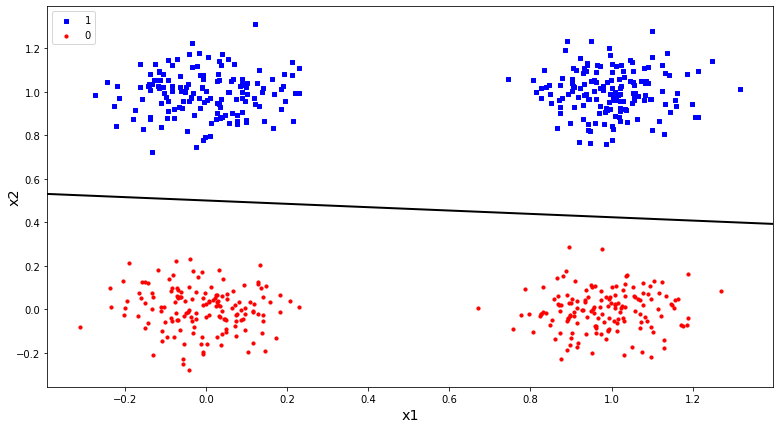

In [29]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 7.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

In [59]:
learning_rate = 0.01
weights = (-100.0, 100.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

c7em = np.round(np.mean(epochs), 4)
c7esd = np.round(np.std(epochs), 4)
c7am = np.round(np.mean(adjustments), 4)
c7asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c7em, " Desvio Padrão: ", c7esd)
print("Ajustes. Média: ", c7am, " Desvio Padrão: ", c7asd)


	Iteração número  1

Quantidade total de épocas: 59
Quantidade total de ajustes: 8452
Vetor final de pesos: [1.7256 1.0289 2.5855]

	Iteração número  2

Quantidade total de épocas: 100
Quantidade total de ajustes: 9551
Vetor final de pesos: [ 1.6473 -2.434   5.4852]

	Iteração número  3

Quantidade total de épocas: 356
Quantidade total de ajustes: 3847
Vetor final de pesos: [ 21.6801 -32.2299  72.0416]

	Iteração número  4

Quantidade total de épocas: 406
Quantidade total de ajustes: 13427
Vetor final de pesos: [  9.2773 -13.7876  30.8175]

	Iteração número  5

Quantidade total de épocas: 230
Quantidade total de ajustes: 10786
Vetor final de pesos: [ 4.9554 -7.3663 16.4653]

	Iteração número  6

Quantidade total de épocas: 840
Quantidade total de ajustes: 3932
Vetor final de pesos: [53.6425 32.0921 80.2381]

	Iteração número  7

Quantidade total de épocas: 51
Quantidade total de ajustes: 8635
Vetor final de pesos: [1.5412 0.91   2.3185]

	Iteração número  8

Quantidade total de épocas


Quantidade total de épocas: 109
Quantidade total de ajustes: 17259
Vetor final de pesos: [ 1.654  -2.4413  5.4936]

	Iteração número  62

Quantidade total de épocas: 37
Quantidade total de ajustes: 16623
Vetor final de pesos: [0.1427 0.0767 0.2197]

	Iteração número  63

Quantidade total de épocas: 738
Quantidade total de ajustes: 9557
Vetor final de pesos: [ 17.9835 -26.733   59.7547]

	Iteração número  64

Quantidade total de épocas: 634
Quantidade total de ajustes: 13183
Vetor final de pesos: [ 14.8812 -22.122   49.4435]

	Iteração número  65

Quantidade total de épocas: 63
Quantidade total de ajustes: 15184
Vetor final de pesos: [ 0.486  -0.6973  1.5945]

	Iteração número  66

Quantidade total de épocas: 48
Quantidade total de ajustes: 1615
Vetor final de pesos: [ 18.8287 -14.1702  43.2222]

	Iteração número  67

Quantidade total de épocas: 413
Quantidade total de ajustes: 12019
Vetor final de pesos: [21.7036 12.9751 32.4608]

	Iteração número  68

Quantidade total de épocas: 771


#### O seguinte vetor de pesos, obtido na última execução da configuração 7, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [60]:
weights = perceptron.weights
weights

array([12.9101, -5.6124, 54.536 ])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [61]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.2367 -(-0.1029)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

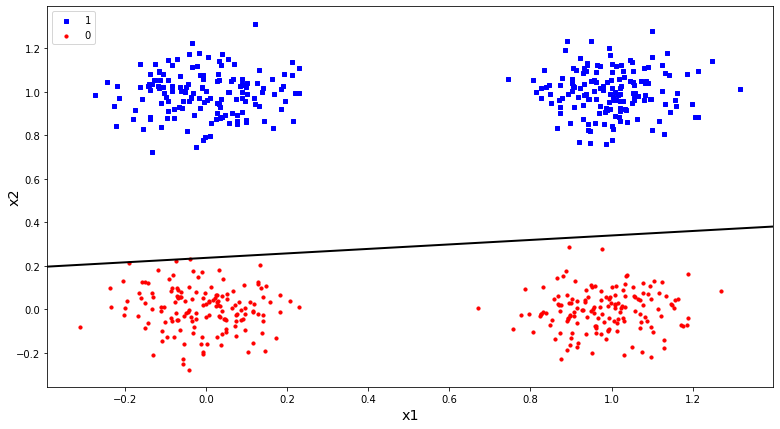

In [62]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 8.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [30]:
learning_rate = 0.01
weights = (-1.0, 1.0)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

c8em = np.round(np.mean(epochs), 4)
c8esd = np.round(np.std(epochs), 4)
c8am = np.round(np.mean(adjustments), 4)
c8asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c8em, " Desvio Padrão: ", c8esd)
print("Ajustes. Média: ", c8am, " Desvio Padrão: ", c8asd)


	Iteração número  1

Quantidade total de épocas: 9
Quantidade total de ajustes: 137
Vetor final de pesos: [ 0.0895 -0.1227  0.3044]

	Iteração número  2

Quantidade total de épocas: 4
Quantidade total de ajustes: 50
Vetor final de pesos: [ 0.1664 -0.048   0.6794]

	Iteração número  3

Quantidade total de épocas: 4
Quantidade total de ajustes: 22
Vetor final de pesos: [ 0.3439 -0.4512  1.0776]

	Iteração número  4

Quantidade total de épocas: 4
Quantidade total de ajustes: 90
Vetor final de pesos: [0.2226 0.0197 0.6559]

	Iteração número  5

Quantidade total de épocas: 3
Quantidade total de ajustes: 39
Vetor final de pesos: [ 0.3089 -0.176   0.6416]

	Iteração número  6

Quantidade total de épocas: 8
Quantidade total de ajustes: 258
Vetor final de pesos: [ 0.0564 -0.0696  0.1905]

	Iteração número  7

Quantidade total de épocas: 3
Quantidade total de ajustes: 46
Vetor final de pesos: [ 0.2516 -0.1293  0.5156]

	Iteração número  8

Quantidade total de épocas: 10
Quantidade total de ajus


Quantidade total de épocas: 12
Quantidade total de ajustes: 197
Vetor final de pesos: [ 0.15   -0.2095  0.506 ]

	Iteração número  64

Quantidade total de épocas: 7
Quantidade total de ajustes: 214
Vetor final de pesos: [0.0442 0.0143 0.0755]

	Iteração número  65

Quantidade total de épocas: 3
Quantidade total de ajustes: 43
Vetor final de pesos: [ 0.1854 -0.2263  0.5536]

	Iteração número  66

Quantidade total de épocas: 8
Quantidade total de ajustes: 275
Vetor final de pesos: [ 0.0415 -0.0448  0.1163]

	Iteração número  67

Quantidade total de épocas: 9
Quantidade total de ajustes: 200
Vetor final de pesos: [0.324  0.1866 0.4983]

	Iteração número  68

Quantidade total de épocas: 8
Quantidade total de ajustes: 57
Vetor final de pesos: [0.2194 0.1234 0.3411]

	Iteração número  69

Quantidade total de épocas: 6
Quantidade total de ajustes: 180
Vetor final de pesos: [0.0793 0.0355 0.1189]

	Iteração número  70

Quantidade total de épocas: 8
Quantidade total de ajustes: 213
Vetor final

#### O seguinte vetor de pesos, obtido na última execução da configuração 8, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [31]:
weights = perceptron.weights
weights

array([ 0.1188, -0.1685,  0.3953])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [32]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.3005 -(-0.4263)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

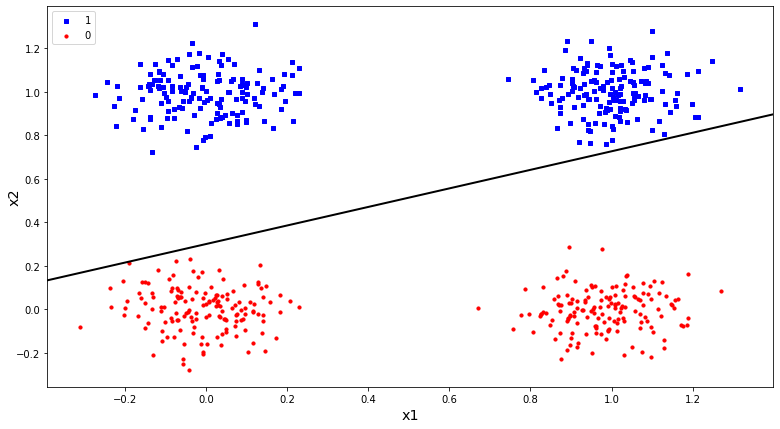

In [33]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

### Configuração 9.
    Valor da taxa de aprendizado: 0.01
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-0.5, +0.5).

In [34]:
learning_rate = 0.01
weights = (-0.5, 0.5)

epochs, adjustments = np.array([]), np.array([])

for i in range(1, 101, 1):
    print("\n\tIteração número ", i)
    
    perceptron = Perceptron(no_of_inputs=2, learning_rate=learning_rate, weights=weights)
    x_train = data0[:,[0,1]]
    y_train = data0[:,2]
    
    number_epochs, number_adjustments = perceptron.fit(x_train, y_train)
    epochs = np.append(epochs, number_epochs)
    adjustments = np.append(adjustments, number_adjustments)

c9em = np.round(np.mean(epochs), 4)
c9esd = np.round(np.std(epochs), 4)
c9am = np.round(np.mean(adjustments), 4)
c9asd = np.round(np.std(adjustments), 4)

print("")
print("Épocas. Média: ", c9em, " Desvio Padrão: ", c9esd)
print("Ajustes. Média: ", c9am, " Desvio Padrão: ", c9asd)


	Iteração número  1

Quantidade total de épocas: 9
Quantidade total de ajustes: 91
Vetor final de pesos: [ 0.1256 -0.1689  0.4031]

	Iteração número  2

Quantidade total de épocas: 7
Quantidade total de ajustes: 112
Vetor final de pesos: [ 0.035  -0.0346  0.0994]

	Iteração número  3

Quantidade total de épocas: 7
Quantidade total de ajustes: 83
Vetor final de pesos: [0.1581 0.0793 0.2354]

	Iteração número  4

Quantidade total de épocas: 5
Quantidade total de ajustes: 64
Vetor final de pesos: [ 0.0057 -0.001   0.0173]

	Iteração número  5

Quantidade total de épocas: 7
Quantidade total de ajustes: 120
Vetor final de pesos: [ 0.0304 -0.0212  0.0853]

	Iteração número  6

Quantidade total de épocas: 7
Quantidade total de ajustes: 110
Vetor final de pesos: [0.1922 0.1031 0.2995]

	Iteração número  7

Quantidade total de épocas: 7
Quantidade total de ajustes: 71
Vetor final de pesos: [ 0.0239 -0.0228  0.0835]

	Iteração número  8

Quantidade total de épocas: 7
Quantidade total de ajustes


Quantidade total de épocas: 5
Quantidade total de ajustes: 32
Vetor final de pesos: [ 0.1071 -0.1391  0.3404]

	Iteração número  66

Quantidade total de épocas: 6
Quantidade total de ajustes: 75
Vetor final de pesos: [0.3162 0.1781 0.4759]

	Iteração número  67

Quantidade total de épocas: 4
Quantidade total de ajustes: 6
Vetor final de pesos: [ 0.0962 -0.128   0.3093]

	Iteração número  68

Quantidade total de épocas: 8
Quantidade total de ajustes: 119
Vetor final de pesos: [ 0.0817 -0.1087  0.273 ]

	Iteração número  69

Quantidade total de épocas: 9
Quantidade total de ajustes: 72
Vetor final de pesos: [ 0.1015 -0.131   0.3179]

	Iteração número  70

Quantidade total de épocas: 7
Quantidade total de ajustes: 81
Vetor final de pesos: [0.0839 0.04   0.141 ]

	Iteração número  71

Quantidade total de épocas: 6
Quantidade total de ajustes: 62
Vetor final de pesos: [0.0579 0.0191 0.0874]

	Iteração número  72

Quantidade total de épocas: 3
Quantidade total de ajustes: 11
Vetor final de 

#### O seguinte vetor de pesos, obtido na última execução da configuração 9, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [35]:
weights = perceptron.weights
weights

array([ 0.0108, -0.0004,  0.019 ])

#### Obtenção da reta solução a partir do último vetor de pesos encontrado

In [36]:
print("Equação da reta solução: x2 = " + 
      str(np.round((weights[0]/weights[2]), 4)) + 
      " -(" + 
      str(np.round((weights[1]/weights[2]), 4)) + 
      ")*x1")

Equação da reta solução: x2 = 0.5684 -(-0.0211)*x1


#### Gráfico do conjunto de dados e a reta que separa as classes

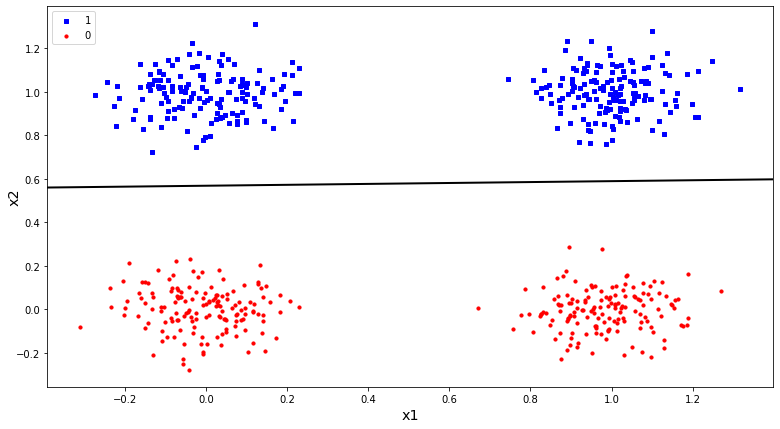

In [37]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')

plt.legend(loc='upper left')
plt.xlabel("x1", size='x-large')
plt.ylabel("x2", labelpad=-5, size='x-large')

slope = -(weights[0]/weights[2]) / (weights[0]/weights[1])  
plt.axline((0, (weights[0]/weights[2])), slope=slope, color="black", lw=2) 

plt.show()

## Resultados

### As tabelas a seguir resumem o resultados obtidos a partir das execuções das cofigurações

#### Ordenando as configurações quanto à média de épocas em ordem decrescente

In [103]:
import pandas as pd

epochs_table = {'Configuração' :['1','2','3','4','5','6','7','8','9'],
                'Taxa de Aprendizado': ['0.4', '0.4', '0.4', '0.1', '0.1', '0.1', '0.01', '0.01', '0.01'],
                'Intervalo de Pesos':['(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',
                                      '(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',
                                      '(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',],
                'Média': [c1em, c2em, c3em, c4em, c5em, c6em, c7em, c8em, c9em],
                'Desvio Padrão': [c1esd, c2esd, c3esd, c4esd, c5esd, c6esd, c7esd, c8esd, c9esd]}

epochs_table = pd.DataFrame(epochs_table)
epochs_table.set_index('Configuração', inplace=True)
epochs_table.sort_values(by='Média', ascending=False)

,Taxa de Aprendizado,Intervalo de Pesos,Média,Desvio Padrão
Configuração,,,,
7,0.01,"(-100.0, +100.0)",376.72,323.3463
4,0.1,"(-100.0, +100.0)",44.78,35.0655
1,0.4,"(-100.0, +100.0)",13.32,7.1118
8,0.01,"(-1.0, +1.0)",7.92,3.0321
9,0.01,"(-0.5, +0.5)",6.70,1.6763
2,0.4,"(-1.0, +1.0)",4.95,1.0428
5,0.1,"(-1.0, +1.0)",4.90,1.2530
3,0.4,"(-0.5, +0.5)",4.89,1.4205
6,0.1,"(-0.5, +0.5)",4.83,1.1140


#### Ordenando as configurações quanto à média de ajustes em ordem decrescente

In [104]:
import pandas as pd

adjusts_table = {'Configuração' :['1','2','3','4','5','6','7','8','9'],
                'Taxa de Aprendizado': ['0.4', '0.4', '0.4', '0.1', '0.1', '0.1', '0.01', '0.01', '0.01'],
                'Intervalo de Pesos':['(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',
                                      '(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',
                                      '(-100.0, +100.0)', '(-1.0, +1.0)', '(-0.5, +0.5)',],
                'Média': [c1am, c2am, c3am, c4am, c5am, c6am, c7am, c8am, c9am],
                'Desvio Padrão': [c1asd, c2asd, c3asd, c4asd, c5asd, c6asd, c7asd, c8asd, c9asd]}

adjusts_table = pd.DataFrame(adjusts_table)
adjusts_table.set_index('Configuração', inplace=True)
adjusts_table.sort_values(by='Média', ascending=False)

,Taxa de Aprendizado,Intervalo de Pesos,Média,Desvio Padrão
Configuração,,,,
7,0.01,"(-100.0, +100.0)",10410.37,6759.3246
4,0.1,"(-100.0, +100.0)",1150.42,651.6664
1,0.4,"(-100.0, +100.0)",322.00,185.7543
8,0.01,"(-1.0, +1.0)",131.74,76.4366
9,0.01,"(-0.5, +0.5)",67.34,38.2827
5,0.1,"(-1.0, +1.0)",16.10,8.8255
6,0.1,"(-0.5, +0.5)",10.58,4.9380
2,0.4,"(-1.0, +1.0)",8.47,3.2725
3,0.4,"(-0.5, +0.5)",7.62,3.3400
